# Roots of Equations by search methods

Find the solutions of $f(x)=0$, where the function $f$ is given.

### Main libraries importation

In [25]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.style as style
from time import time
from sklearn import linear_model
style.available
%matplotlib inline
style.use('fivethirtyeight')

Some search roots algorithms are presented following:

### 1. Bisection method

Bisection is not the faster method available for computing roots, but it is the most reliable one. Once a root has been bracketed, bisection will always close in on it.

In [26]:
def bisect(f,a,b,tol,rootr):
    k = 0
    err = [];
    delta = [];
    db = tol*2
    while db>tol:
        m = a+(b-a)/2
        if np.sign(f(a)) == np.sign(f(m)):
            a = m
        else:
            b = m
        k = k +1;
        db = abs(b-a)
        err.append(abs(m-rootr));
        delta.append(db);
    return m, k, err, delta

### 2. Secant method

Secant requires two starting estimates of the roots, i.e., $x_1$ and $x_2$. The function $f(x)$ is assumed to be approximately linear near the root, so that the improved value $x_3$ of the root can be estimated by linear interpolation between $x_1$ and $x_2$.

In [27]:
def secant(f,a,b,tol,rootr):
    x = []
    err = [];
    delta = [];
    x.append(a);
    x.append(b);
    k = 0
    db = 2*tol
    while db>tol:
        k = k+1
        x.append(np.array(x[k])-(f(np.array(x[k]))*(np.array(x[k])-np.array(x[k-1])))/(f(np.array(x[k]))-f(np.array(x[k-1]))))
        db = abs(np.array(x[k])-np.array(x[k+1]))
        err.append(abs(x[k]-rootr));
        delta.append(db);
    return x[k], k, err, delta

### 3. Newton-Raphson method

The method starts with a function $f(x)$ defined over $x\in\mathbb{R}$, the function's derivative $f'(x)$, and an initial guess x_0 for a root of the function $f(x)$. If the function satisfies the assumptions made in the derivation of the formula and the initial guess is close. The Newton-Raphson formula can be derived from the Taylor series expansion of $f(x)$ about $x$:
    \begin{equation}
f(x_{i+1})=f(x_i)+f'(x_i)(x_{i+1}-x_i)+\mathcal{O}(x_i+1-x_i)^2
    \end{equation}

where $\mathcal{O}(z)$ is to be read as "of the order of $z$". If $x_{i+1}$ is a root of $f(x)=0$, this equation can be rewriten as
    \begin{equation}
0=f(x_i)+f'(x_i)(x_{i+1}-x_i)+\mathcal{O}(x_i+1-x_i)^2
    \end{equation}


In [28]:
def newton(f,df,a,tol,rootr):
    x = []
    x.append(a);
    err = [];
    delta = [];
    k = 0
    db = 2*tol;
    while db >tol:
        x.append(np.array(x[k])-f(np.array(x[k]))/df(np.array(x[k])))
        db = abs(np.array(x[k])-np.array(x[k+1]))
        k = k+1
        err.append(abs(x[k]-rootr));
        delta.append(db);
    return x[k], k, err, delta

### 4. Brent's method

Brent's method combines bisection and inverse quadratic interpolation. It has the reliability of bisection but it can be as quick as some of the less-reliable methods. The algorithm tries to use the potentially fast-converging secant method or inverse quadratic interpolation if possible, but it falls back to the more robust bisection method if necessary. 

In [29]:
def brent(f,a,b,c,tol,rootr):
    db = 2*tol;
    k = 0;
    err = [];
    delta = [];
    while (db > tol):
        u = f(b)/f(c)
        v = f(b)/f(a)
        w = f(a)/f(c)
        p = v*(w*(u-w)*(c-b)-(1-u)*(b-a))
        q = (w-1)*(u-1)*(v-1)
        bnew = b + p/q
        db = abs(b-bnew)
        c = a
        a = b
        b = bnew
        k = k+1;
        err.append(abs(b-rootr));
        delta.append(db);
    return b, k, err, delta

### Functions evaluation

In [30]:
def f1(x):
    return x**2-2

def df1(x):
    return 2*x

def f2(x):
    return x**3-10*x**2+5

def df2(x):
    return 3*x**2-20*x

def f3(x):
    return np.exp(x)*np.sin(x)+4

def df3(x):
    return np.exp(x)*(np.sin(x)+np.cos(x))

def f4(x):
    return np.cosh(x)*np.cos(x)-1

def df4(x):
    return np.cos(x)*np.sinh(x)-np.sin(x)*np.cosh(x)


### Linear regression

In [31]:
def regression(x,y):
    sumxy = np.sum(x*y);
    sumx = np.sum(x);
    sumy = np.sum(y);
    sumx2 = np.sum(x**2);
    n = np.size(x);
    m = (n*sumxy-sumx*sumy)/(n*sumx2-sumx**2);
    b = (sumy-m*sumx)/n
    return m,b

### Theoretical roots

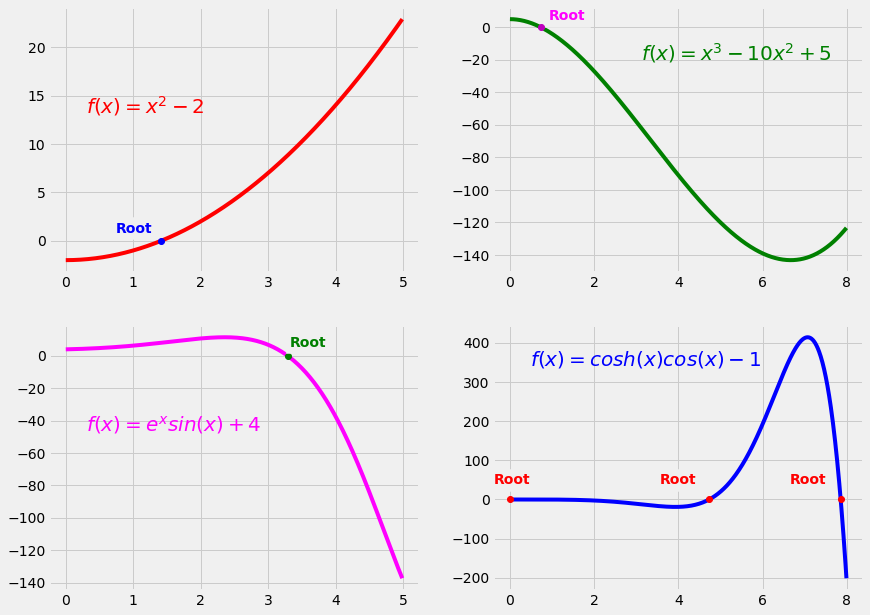

In [77]:
root1=np.sqrt(2);
root2=0.7346035077893032603269325;
root3=3.29101261214024640141055856;
root4_1=4.73004074486270402602404810;
root4_2=7.85320462409583755647706669;
root4_3=0.0;

fig = plt.figure(figsize=(13,10));
fte_graph=fig.add_subplot(221);
fte_graph.plot(np.arange(0,5,0.01),f1(np.arange(0,5,0.01)), color='red');
fte_graph.plot(root1,f1(root1),'ob');
fte_graph.text(x = 0.1, y = 0.6, s = "$f(x)=x^2-2$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='red')
fte_graph.text(x = 0.23, y = 0.15, s = 'Root', color = 'blue',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)

fte_graph=fig.add_subplot(222);
fte_graph.plot(np.arange(0,8,0.01),f2(np.arange(0,8,0.01)), color='green');
fte_graph.plot(root2,f2(root2),'om');
fte_graph.text(x = 0.4, y = 0.8, s = "$f(x)=x^3-10x^2+5$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='green')
fte_graph.text(x = 0.2, y = 0.95, s = 'Root', color = 'magenta',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)



fte_graph=fig.add_subplot(223);
fte_graph.plot(np.arange(0,5,0.01),f3(np.arange(0,5,0.01)), color='magenta');
fte_graph.plot(root3,f3(root3),'og');
fte_graph.text(x = 0.1, y = 0.6, s = "$f(x)=e^{x}sin(x)+4$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='magenta')
fte_graph.text(x = 0.7, y = 0.92, s = 'Root', color = 'green',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)



fte_graph=fig.add_subplot(224);
fte_graph.plot(np.arange(0,8,0.01),f4(np.arange(0,8,0.01)),color='blue');
fte_graph.plot(root4_1,f4(root4_1),'or');
fte_graph.plot(root4_2,f4(root4_2),'or');
fte_graph.plot(root4_3,f4(root4_3),'or');
fte_graph.text(x = 0.1, y = 0.85, s = "$f(x)=cosh(x)cos(x)-1$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='blue')
fte_graph.text(x = 0.5, y = 0.4, s = 'Root', color = 'red',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.05, y = 0.4, s = 'Root', color = 'red',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.85, y = 0.4, s = 'Root', color = 'red',horizontalalignment='center',  backgroundcolor = '#f0f0f0',weight = 'bold', rotation = 0,transform=fte_graph.transAxes)

fig.savefig('Functions.svg')

## Results and Simulations

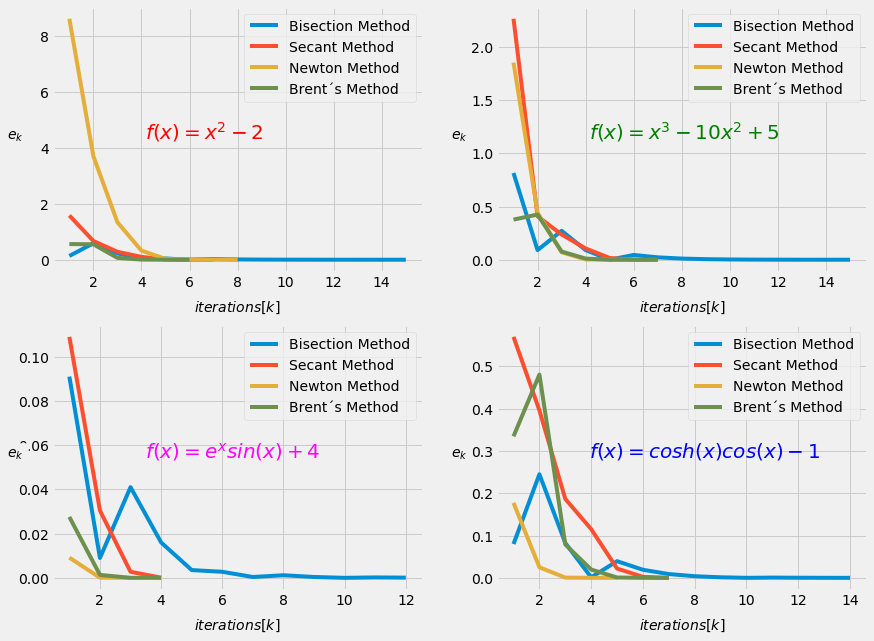

In [78]:
a = 0.1
b = 3
c = 5
tol = 1e-4;
[rootb1, iterb1, errb1, deltab1] = bisect(f1,a,b,tol,root1)
[roots1, iters1, errs1, deltas1] = secant(f1,a,b,tol,root1)
[rootn1, itern1, errn1, deltan1] = newton(f1,df1,a,tol,root1)
[rootbr1, iterbr1, errbr1, deltabr1] = brent(f1,a,b,c,tol,root1)

[rootb2, iterb2, errb2, deltab2] = bisect(f2,a,b,tol,root2)
[roots2, iters2, errs2, deltas2] = secant(f2,a,b,tol,root2)
[rootn2, itern2, errn2, deltan2] = newton(f2,df2,a,tol,root2)
[rootbr2, iterbr2, errbr2, deltabr2] = brent(f2,a,b,c,tol,root2)

a = 3
b = 3.4
c = 6

[rootb3, iterb3, errb3, deltab3] = bisect(f3,a,b,tol,root3)
[roots3, iters3, errs3, deltas3] = secant(f3,a,b,tol,root3)
[rootn3, itern3, errn3, deltan3] = newton(f3,df3,b,tol,root3)
[rootbr3, iterbr3, errbr3, deltabr3] = brent(f3,a,b,c,tol,root3)

a = 4
b = 5.3
c = 6


[rootb4, iterb4, errb4, deltab4] = bisect(f4,a,b,tol,root4_1)
[roots4, iters4, errs4, deltas4] = secant(f4,a,b,tol,root4_1)
[rootn4, itern4, errn4, deltan4] = newton(f4,df4,b,tol,root4_1)
[rootbr4, iterbr4, errbr4, deltabr4] = brent(f4,a,b,c,tol,root4_1)


fig = plt.figure(figsize=(13,10));
fte_graph = fig.add_subplot(221);
fte_graph.plot(np.arange(1,iterb1+1),np.array(errb1),label='Bisection Method')
fte_graph.plot(np.arange(1,iters1+1),np.array(errs1),label='Secant Method')
fte_graph.plot(np.arange(1,itern1+1),np.array(errn1),label='Newton Method')
fte_graph.plot(np.arange(1,iterbr1+1),np.array(errbr1),label='Brent´s Method')
fte_graph.text(x = 0.5, y = -0.15, s = '$iterations [k]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.1, y = 0.5, s = '$e_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.25, y = 0.5, s = "$f(x)=x^2-2$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='red')
fte_graph.legend()


fte_graph = fig.add_subplot(222);
fte_graph.plot(np.arange(1,iterb2+1),np.array(errb2),label='Bisection Method')
fte_graph.plot(np.arange(1,iters2+1),np.array(errs2),label='Secant Method')
fte_graph.plot(np.arange(1,itern2+1),np.array(errn2),label='Newton Method')
fte_graph.plot(np.arange(1,iterbr2+1),np.array(errbr2),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.15, s = '$iterations [k]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.1, y = 0.5, s = '$e_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.25, y = 0.5, s = "$f(x)=x^3-10x^2+5$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='green')
fte_graph.legend()


fte_graph = fig.add_subplot(223);
fte_graph.plot(np.arange(1,iterb3+1),np.array(errb3),label='Bisection Method')
fte_graph.plot(np.arange(1,iters3+1),np.array(errs3),label='Secant Method')
fte_graph.plot(np.arange(1,itern3+1),np.array(errn3),label='Newton Method')
fte_graph.plot(np.arange(1,iterbr3+1),np.array(errbr3),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.15, s = '$iterations [k]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.1, y = 0.5, s = '$e_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.25, y = 0.5, s = "$f(x)=e^{x}sin(x)+4$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='magenta')
fte_graph.legend()

fte_graph = fig.add_subplot(224);
fte_graph.plot(np.arange(1,iterb4+1),np.array(errb4),label='Bisection Method')
fte_graph.plot(np.arange(1,iters4+1),np.array(errs4),label='Secant Method')
fte_graph.plot(np.arange(1,itern4+1),np.array(errn4),label='Newton Method')
fte_graph.plot(np.arange(1,iterbr4+1),np.array(errbr4),label='Brent´s Method')
fte_graph.text(x = 0.5, y = -0.15, s = '$iterations [k]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.1, y = 0.5, s = '$e_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.25, y = 0.5, s = "$f(x)=cosh(x)cos(x)-1$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='blue')
fte_graph.legend()

fig.savefig('ErrorVsIter.svg')

In [34]:
print('Amoung of iteration using f(x)=x^2-2')
print('--------------------------------------')
print('Bisect Method iterations:',iterb1)
print('Secant Method iterations:',iters1)
print('Newton Method iterations:',itern1)
print('Brent´s Method iterations:',iterbr1)

print('Amoung of iteration using f(x)=x^3-10x^2+5')
print('--------------------------------------')
print('Bisect Method iterations:',iterb1)
print('Secant Method iterations:',iters2)
print('Newton Method iterations:',itern2)
print('Brent´s Method iterations:',iterbr2)

print('Amoung of iteration using f(x)=e^{x}sin(x)+4')
print('--------------------------------------')
print('Bisect Method iterations:',iterb3)
print('Secant Method iterations:',iters3)
print('Newton Method iterations:',itern3)
print('Brent´s Method iterations:',iterbr3)

print('Amoung of iteration using f(x)=cosh(x)cos(x)-1')
print('--------------------------------------')
print('Bisect Method iterations:',iterb4)
print('Secant Method iterations:',iters4)
print('Newton Method iterations:',itern4)
print('Brent´s Method iterations:',iterbr4)


Amoung of iteration using f(x)=x^2-2
--------------------------------------
Bisect Method iterations: 15
Secant Method iterations: 7
Newton Method iterations: 8
Brent´s Method iterations: 6
Amoung of iteration using f(x)=x^3-10x^2+5
--------------------------------------
Bisect Method iterations: 15
Secant Method iterations: 7
Newton Method iterations: 6
Brent´s Method iterations: 7
Amoung of iteration using f(x)=e^{x}sin(x)+4
--------------------------------------
Bisect Method iterations: 12
Secant Method iterations: 4
Newton Method iterations: 3
Brent´s Method iterations: 4
Amoung of iteration using f(x)=cosh(x)cos(x)-1
--------------------------------------
Bisect Method iterations: 14
Secant Method iterations: 7
Newton Method iterations: 5
Brent´s Method iterations: 7


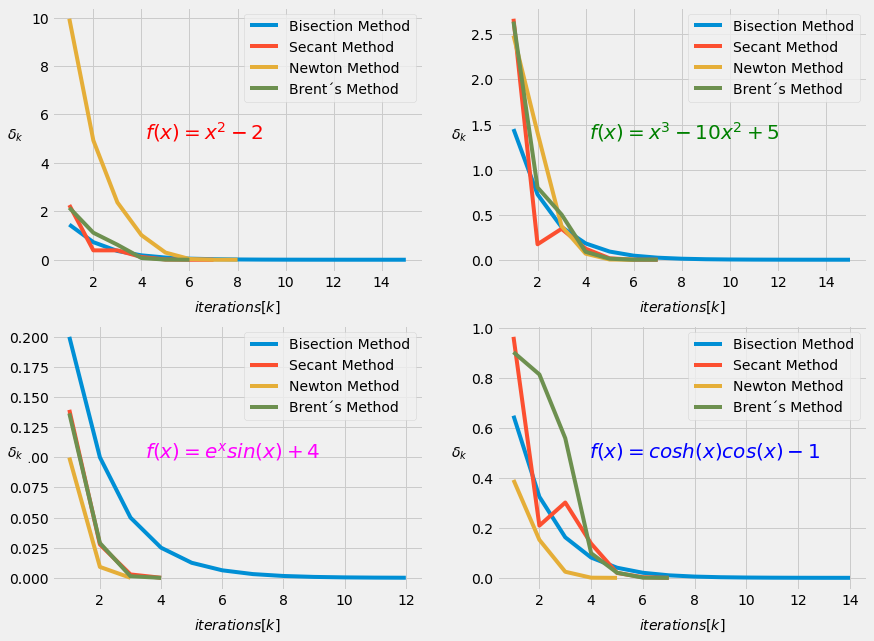

In [79]:
fig = plt.figure(figsize=(13,10));
fte_graph = fig.add_subplot(221);
fte_graph.plot(np.arange(1,iterb1+1),np.array(deltab1),label='Bisection Method')
fte_graph.plot(np.arange(1,iters1+1),np.array(deltas1),label='Secant Method')
fte_graph.plot(np.arange(1,itern1+1),np.array(deltan1),label='Newton Method')
fte_graph.plot(np.arange(1,iterbr1+1),np.array(deltabr1),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.15, s = '$iterations [k]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.1, y = 0.5, s = '$\delta_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.25, y = 0.5, s = "$f(x)=x^2-2$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='red')
fte_graph.legend()

fte_graph = fig.add_subplot(222);
fte_graph.plot(np.arange(1,iterb2+1),np.array(deltab2),label='Bisection Method')
fte_graph.plot(np.arange(1,iters2+1),np.array(deltas2),label='Secant Method')
fte_graph.plot(np.arange(1,itern2+1),np.array(deltan2),label='Newton Method')
fte_graph.plot(np.arange(1,iterbr2+1),np.array(deltabr2),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.15, s = '$iterations [k]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.1, y = 0.5, s = '$\delta_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.25, y = 0.5, s = "$f(x)=x^3-10x^2+5$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='green')
fte_graph.legend()

fte_graph = fig.add_subplot(223);
fte_graph.plot(np.arange(1,iterb3+1),np.array(deltab3),label='Bisection Method')
fte_graph.plot(np.arange(1,iters3+1),np.array(deltas3),label='Secant Method')
fte_graph.plot(np.arange(1,itern3+1),np.array(deltan3),label='Newton Method')
fte_graph.plot(np.arange(1,iterbr3+1),np.array(deltabr3),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.15, s = '$iterations [k]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.1, y = 0.5, s = '$\delta_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.25, y = 0.5, s = "$f(x)=e^{x}sin(x)+4$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='magenta')
fte_graph.legend()

fte_graph = fig.add_subplot(224);
fte_graph.plot(np.arange(1,iterb4+1),np.array(deltab4),label='Bisection Method')
fte_graph.plot(np.arange(1,iters4+1),np.array(deltas4),label='Secant Method')
fte_graph.plot(np.arange(1,itern4+1),np.array(deltan4),label='Newton Method')
fte_graph.plot(np.arange(1,iterbr4+1),np.array(deltabr4),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.15, s = '$iterations [k]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.1, y = 0.5, s = '$\delta_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.25, y = 0.5, s = "$f(x)=cosh(x)cos(x)-1$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='blue')
fte_graph.legend()

fig.savefig('DeltaVsIter.svg')

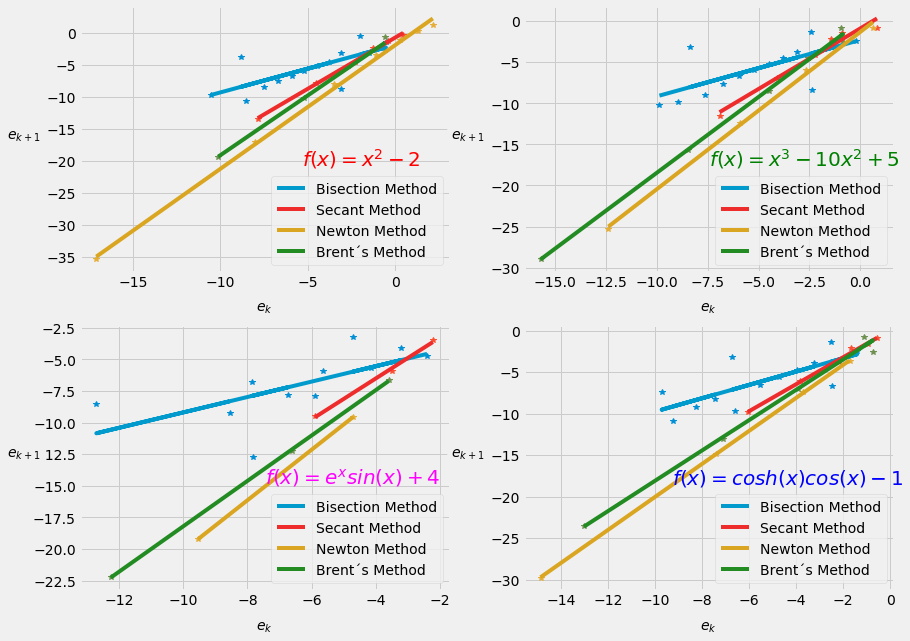

In [88]:
fig = plt.figure(figsize=(13,10));
fte_graph = fig.add_subplot(221);
fte_graph.plot(np.log(np.array(errb1)[0:iterb1-1]),np.log(np.array(errb1)[1:iterb1]),'*')
fte_graph.plot(np.log(np.array(errs1)[0:iters1-1]),np.log(np.array(errs1)[1:iters1]),'*')
fte_graph.plot(np.log(np.array(errn1)[0:itern1-1]),np.log(np.array(errn1)[1:itern1]),'*')
fte_graph.plot(np.log(np.array(errbr1)[0:iterbr1-1]),np.log(np.array(errbr1)[1:iterbr1]),'*') 
fte_graph.text(x = 0.5, y = -0.15, s = '$e_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.15, y = 0.5, s = '$e_{k+1}$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.6, y = 0.4, s = "$f(x)=x^2-2$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='red')

[mb1,bb1]=regression(np.log(np.array(errb1)[0:iterb1-1]),np.log(np.array(errb1)[1:iterb1]));
fte_graph.plot(np.log(np.array(errb1)[0:iterb1-1]),mb1*np.log(np.array(errb1)[0:iterb1-1])+bb1,color='#009ACD',label='Bisection Method');
[ms1,bs1]=regression(np.log(np.array(errs1)[0:iters1-1]),np.log(np.array(errs1)[1:iters1]));
fte_graph.plot(np.log(np.array(errs1)[0:iters1-1]),ms1*np.log(np.array(errs1)[0:iters1-1])+bs1,color='#EE2C2C',label='Secant Method');
[mn1,bn1]=regression(np.log(np.array(errn1)[0:itern1-1]),np.log(np.array(errn1)[1:itern1]));
fte_graph.plot(np.log(np.array(errn1)[0:itern1-1]),mn1*np.log(np.array(errn1)[0:itern1-1])+bn1,color='#DAA520',label='Newton Method');
[mbr1,bbr1]=regression(np.log(np.array(errbr1)[0:iterbr1-1]),np.log(np.array(errbr1)[1:iterbr1]));
fte_graph.plot(np.log(np.array(errbr1)[0:iterbr1-1]),mbr1*np.log(np.array(errbr1)[0:iterbr1-1])+bbr1,color='#228B22',label='Brent´s Method');

fte_graph.legend()

fte_graph = fig.add_subplot(222);
fte_graph.plot(np.log(np.array(errb2)[0:iterb2-1]),np.log(np.array(errb2)[1:iterb2]),'*')
fte_graph.plot(np.log(np.array(errs2)[0:iters2-1]),np.log(np.array(errs2)[1:iters2]),'*')
fte_graph.plot(np.log(np.array(errn2)[0:itern2-1]),np.log(np.array(errn2)[1:itern2]),'*')
fte_graph.plot(np.log(np.array(errbr2)[0:iterbr2-1]),np.log(np.array(errbr2)[1:iterbr2]),'*') 
fte_graph.text(x = 0.5, y = -0.15, s = '$e_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.15, y = 0.5, s = '$e_{k+1}$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.5, y = 0.4, s = "$f(x)=x^3-10x^2+5$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='green')

[mb2,bb2]=regression(np.log(np.array(errb2)[0:iterb2-1]),np.log(np.array(errb2)[1:iterb2]));
fte_graph.plot(np.log(np.array(errb2)[0:iterb2-1]),mb2*np.log(np.array(errb2)[0:iterb2-1])+bb2,color='#009ACD',label='Bisection Method');
[ms2,bs2]=regression(np.log(np.array(errs2)[0:iters2-1]),np.log(np.array(errs2)[1:iters2]));
fte_graph.plot(np.log(np.array(errs2)[0:iters2-1]),ms2*np.log(np.array(errs2)[0:iters2-1])+bs2,color='#EE2C2C',label='Secant Method');
[mn2,bn2]=regression(np.log(np.array(errn2)[0:itern2-1]),np.log(np.array(errn2)[1:itern2]));
fte_graph.plot(np.log(np.array(errn2)[0:itern2-1]),mn2*np.log(np.array(errn2)[0:itern2-1])+bn2,color='#DAA520',label='Newton Method');
[mbr2,bbr2]=regression(np.log(np.array(errbr2)[0:iterbr2-1]),np.log(np.array(errbr2)[1:iterbr2]));
fte_graph.plot(np.log(np.array(errbr2)[0:iterbr2-1]),mbr2*np.log(np.array(errbr2)[0:iterbr2-1])+bbr2,color='#228B22',label='Brent´s Method');


fte_graph.legend()

fte_graph = fig.add_subplot(223);
fte_graph.plot(np.log(np.array(errb3)[0:iterb3-1]),np.log(np.array(errb3)[1:iterb3]),'*')
fte_graph.plot(np.log(np.array(errs3)[0:iters3-1]),np.log(np.array(errs3)[1:iters3]),'*')
fte_graph.plot(np.log(np.array(errn3)[0:itern3-1]),np.log(np.array(errn3)[1:itern3]),'*')
fte_graph.plot(np.log(np.array(errbr3)[0:iterbr3-1]),np.log(np.array(errbr3)[1:iterbr3]),'*') 
fte_graph.text(x = 0.5, y = -0.15, s = '$e_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.15, y = 0.5, s = '$e_{k+1}$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.5, y = 0.4, s = "$f(x)=e^{x}sin(x)+4$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='magenta')

[mb3,bb3]=regression(np.log(np.array(errb3)[0:iterb3-1]),np.log(np.array(errb3)[1:iterb3]));
fte_graph.plot(np.log(np.array(errb3)[0:iterb3-1]),mb3*np.log(np.array(errb3)[0:iterb3-1])+bb3,color='#009ACD',label='Bisection Method');
[ms3,bs3]=regression(np.log(np.array(errs3)[0:iters3-1]),np.log(np.array(errs3)[1:iters3]));
fte_graph.plot(np.log(np.array(errs3)[0:iters3-1]),ms3*np.log(np.array(errs3)[0:iters3-1])+bs3,color='#EE2C2C',label='Secant Method');
[mn3,bn3]=regression(np.log(np.array(errn3)[0:itern3-1]),np.log(np.array(errn3)[1:itern3]));
fte_graph.plot(np.log(np.array(errn3)[0:itern3-1]),mn3*np.log(np.array(errn3)[0:itern3-1])+bn3,color='#DAA520',label='Newton Method');
[mbr3,bbr3]=regression(np.log(np.array(errbr3)[0:iterbr3-1]),np.log(np.array(errbr3)[1:iterbr3]));
fte_graph.plot(np.log(np.array(errbr3)[0:iterbr3-1]),mbr3*np.log(np.array(errbr3)[0:iterbr3-1])+bbr3,color='#228B22',label='Brent´s Method');


fte_graph.legend()

fte_graph = fig.add_subplot(224);
fte_graph.plot(np.log(np.array(errb4)[0:iterb4-1]),np.log(np.array(errb4)[1:iterb4]),'*')
fte_graph.plot(np.log(np.array(errs4)[0:iters4-1]),np.log(np.array(errs4)[1:iters4]),'*')
fte_graph.plot(np.log(np.array(errn4)[0:itern4-1]),np.log(np.array(errn4)[1:itern4]),'*')
fte_graph.plot(np.log(np.array(errbr4)[0:iterbr4-1]),np.log(np.array(errbr4)[1:iterbr4]),'*') 
fte_graph.text(x = 0.5, y = -0.15, s = '$e_k$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.15, y = 0.5, s = '$e_{k+1}$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = 0.4, y = 0.4, s = "$f(x)=cosh(x)cos(x)-1$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='blue')

[mb4,bb4]=regression(np.log(np.array(errb4)[0:iterb4-1]),np.log(np.array(errb4)[1:iterb4]));
fte_graph.plot(np.log(np.array(errb4)[0:iterb4-1]),mb4*np.log(np.array(errb4)[0:iterb4-1])+bb4,color='#009ACD',label='Bisection Method');
[ms4,bs4]=regression(np.log(np.array(errs4)[0:iters4-1]),np.log(np.array(errs4)[1:iters4]));
fte_graph.plot(np.log(np.array(errs4)[0:iters4-1]),ms4*np.log(np.array(errs4)[0:iters4-1])+bs4,color='#EE2C2C',label='Secant Method');
[mn4,bn4]=regression(np.log(np.array(errn4)[0:itern4-1]),np.log(np.array(errn4)[1:itern4]));
fte_graph.plot(np.log(np.array(errn4)[0:itern4-1]),mn4*np.log(np.array(errn4)[0:itern4-1])+bn4,color='#DAA520',label='Newton Method');
[mbr4,bbr4]=regression(np.log(np.array(errbr4)[0:iterbr4-1]),np.log(np.array(errbr4)[1:iterbr4]));
fte_graph.plot(np.log(np.array(errbr4)[0:iterbr4-1]),mbr4*np.log(np.array(errbr4)[0:iterbr4-1])+bbr4,color='#228B22',label='Brent´s Method');


fte_graph.legend()
fig.savefig('ErrVsErr1.svg')


In [39]:
print('Convergence ratio using f(x)=x^2-2')
print('--------------------------------------')
print('Bisect Method:',mb1)
print('Secant Method:',ms1)
print('Newton Method:',mn1)
print('Brent´s Method:',mbr1)

print('Convergence ratio using f(x)=x^3-10x^2+5')
print('--------------------------------------')
print('Bisect Method iterations:',mb2)
print('Secant Method iterations:',ms2)
print('Newton Method iterations:',mn2)
print('Brent´s Method iterations:',mbr2)

print('Convergence ratio using f(x)=e^{x}sin(x)+4')
print('--------------------------------------')
print('Bisect Method iterations:',mb3)
print('Secant Method iterations:',ms3)
print('Newton Method iterations:',mn3)
print('Brent´s Method iterations:',mbr3)

print('Convergence ratio using f(x)=cosh(x)cos(x)-1')
print('--------------------------------------')
print('Bisect Method iterations:',mb4)
print('Secant Method iterations:',ms4)
print('Newton Method iterations:',mn4)
print('Brent´s Method iterations:',mbr4)

Convergence ratio using f(x)=x^2-2
--------------------------------------
Bisect Method: 0.7413373690059678
Secant Method: 1.5986582966577323
Newton Method: 1.9304210195851492
Brent´s Method: 1.8647148446439488
Convergence ratio using f(x)=x^3-10x^2+5
--------------------------------------
Bisect Method iterations: 0.685982030652774
Secant Method iterations: 1.4727122745018753
Newton Method iterations: 1.9127947124310607
Brent´s Method iterations: 1.8446184129002812
Convergence ratio using f(x)=e^{x}sin(x)+4
--------------------------------------
Bisect Method iterations: 0.6087827833600463
Secant Method iterations: 1.6182402756111391
Newton Method iterations: 1.997816197434263
Brent´s Method iterations: 1.7943337796618282
Convergence ratio using f(x)=cosh(x)cos(x)-1
--------------------------------------
Bisect Method iterations: 0.8036363547973966
Secant Method iterations: 1.6248661790609886
Newton Method iterations: 1.9880720460933567
Brent´s Method iterations: 1.825847859913256


In [41]:
tol = np.array([1e-1,1e-2,1e-3,1e-4]);
N = np.size(tol)
timeb1 = []
times1 = []
timen1 = []
timebr1 = []

timeb2 = []
times2 = []
timen2 = []
timebr2 = []

timeb3 = []
times3 = []
timen3 = []
timebr3 = []

timeb4 = []
times4 = []
timen4 = []
timebr4 = []


for index in np.arange(N):
    a = 0.1
    b = 3
    c = 5
    start_timeb1 = time()
    [rootb, iterb, errb, deltab] = bisect(f1,a,b,tol[index],root1)
    elapsed_timeb1 = time() - start_timeb1
    
    start_times1 = time()
    [roots, iters, errs, deltas] = secant(f1,a,b,tol[index],root1)
    elapsed_times1 = time() - start_times1
    
    start_timen1 = time()
    [rootn, itern, errn, deltan] = newton(f1,df1,a,tol[index],root1)
    elapsed_timen1 = time() - start_timen1
    
    start_timebr1 = time()
    [rootbr, iterbr, errbr, deltabr] = brent(f1,a,b,c,tol[index],root1)
    elapsed_timebr1 = time() - start_timebr1
    
    timeb1.append(elapsed_timeb1)
    times1.append(elapsed_times1)
    timen1.append(elapsed_timen1)
    timebr1.append(elapsed_timebr1)
    
    ##################################################
    
    start_timeb2 = time()
    [rootb, iterb, errb, deltab] = bisect(f2,a,b,tol[index],root2)
    elapsed_timeb2 = time() - start_timeb2
    
    start_times2 = time()
    [roots, iters, errs, deltas] = secant(f2,a,b,tol[index],root2)
    elapsed_times2 = time() - start_times2
    
    start_timen2 = time()
    [rootn, itern, errn, deltan] = newton(f2,df2,a,tol[index],root2)
    elapsed_timen2 = time() - start_timen2
    
    start_timebr2 = time()
    [rootbr, iterbr, errbr, deltabr] = brent(f2,a,b,c,tol[index],root2)
    elapsed_timebr2 = time() - start_timebr2
    
    timeb2.append(elapsed_timeb2)
    times2.append(elapsed_times2)
    timen2.append(elapsed_timen2)
    timebr2.append(elapsed_timebr2)
    
    ##################################################    
    a = 3
    b = 3.4
    c = 6

    
    start_timeb3 = time()
    [rootb, iterb, errb, deltab] = bisect(f3,a,b,tol[index],root3)
    elapsed_timeb3 = time() - start_timeb3
    
    start_times3 = time()
    [roots, iters, errs, deltas] = secant(f3,a,b,tol[index],root3)
    elapsed_times3 = time() - start_times3
    
    start_timen3 = time()
    [rootn, itern, errn, deltan] = newton(f3,df3,b,tol[index],root3)
    elapsed_timen3 = time() - start_timen3
    
    start_timebr3 = time()
    [rootbr, iterbr, errbr, deltabr] = brent(f3,a,b,c,tol[index],root3)
    elapsed_timebr3 = time() - start_timebr3
    
    timeb3.append(elapsed_timeb3)
    times3.append(elapsed_times3)
    timen3.append(elapsed_timen3)
    timebr3.append(elapsed_timebr3)
    
    ##################################################
     
    a = 4
    b = 5.3
    c = 6
    
    start_timeb4 = time()
    [rootb, iterb, errb, deltab] = bisect(f4,a,b,tol[index],root4_1)
    elapsed_timeb4 = time() - start_timeb4
    
    start_times4 = time()
    [roots, iters, errs, deltas] = secant(f4,a,b,tol[index],root4_1)
    elapsed_times4 = time() - start_times4
    
    start_timen4 = time()
    [rootn, itern, errn, deltan] = newton(f4,df4,b,tol[index],root4_1)
    elapsed_timen4 = time() - start_timen4
    
    start_timebr4 = time()
    [rootbr, iterbr, errbr, deltabr] = brent(f4,a,b,c,tol[index],root4_1)
    elapsed_timebr4 = time() - start_timebr4
    
    timeb4.append(elapsed_timeb4)
    times4.append(elapsed_times4)
    timen4.append(elapsed_timen4)
    timebr4.append(elapsed_timebr4)
    

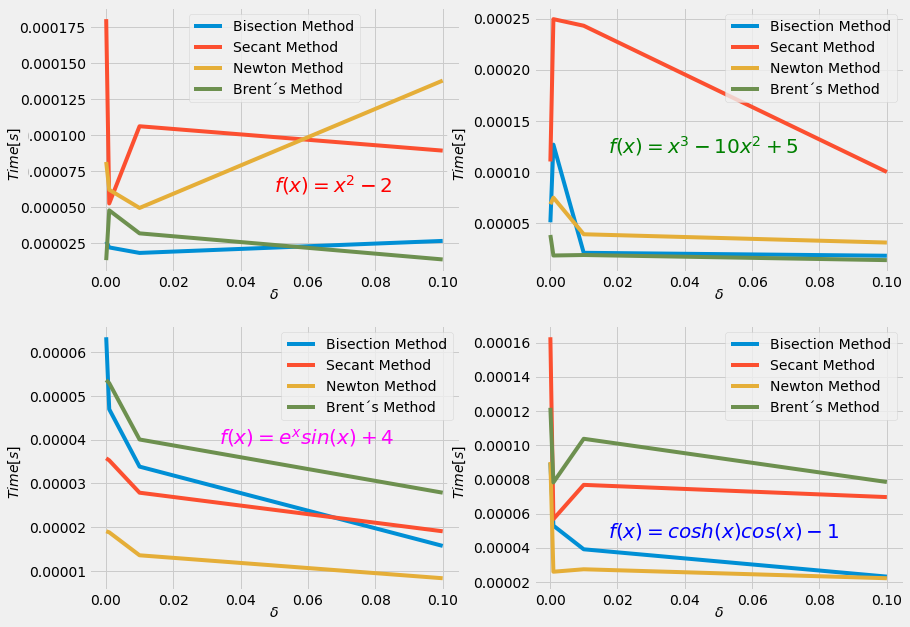

In [63]:
fig = plt.figure(figsize=(13,10));
fte_graph = fig.add_subplot(221);
fte_graph.plot(tol,np.array(timeb1),label='Bisection Method')
fte_graph.plot(tol,np.array(times1),label='Secant Method')
fte_graph.plot(tol,np.array(timen1),label='Newton Method')
fte_graph.plot(tol,np.array(timebr1),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.1, s = '$\delta$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.2, y = 0.5, s = '$Time [s]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 90,transform=fte_graph.transAxes)
fte_graph.text(x = 0.5, y = 0.3, s = "$f(x)=x^2-2$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='red')
fte_graph.legend()

fte_graph = fig.add_subplot(222);
fte_graph.plot(tol,np.array(timeb2),label='Bisection Method')
fte_graph.plot(tol,np.array(times2),label='Secant Method')
fte_graph.plot(tol,np.array(timen2),label='Newton Method')
fte_graph.plot(tol,np.array(timebr2),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.1, s = '$\delta$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.2, y = 0.5, s = '$Time [s]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 90,transform=fte_graph.transAxes)
fte_graph.text(x = 0.2, y = 0.45, s = "$f(x)=x^3-10x^2+5$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold', color='green')
fte_graph.legend()

fte_graph = fig.add_subplot(223);
fte_graph.plot(tol,np.array(timeb3),label='Bisection Method')
fte_graph.plot(tol,np.array(times3),label='Secant Method')
fte_graph.plot(tol,np.array(timen3),label='Newton Method')
fte_graph.plot(tol,np.array(timebr3),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.1, s = '$\delta$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.2, y = 0.5, s = '$Time [s]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 90,transform=fte_graph.transAxes)
fte_graph.text(x = 0.35, y = 0.55, s = "$f(x)=e^{x}sin(x)+4$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='magenta')
fte_graph.legend()

fte_graph = fig.add_subplot(224);
fte_graph.plot(tol,np.array(timeb4),label='Bisection Method')
fte_graph.plot(tol,np.array(times4),label='Secant Method')
fte_graph.plot(tol,np.array(timen4),label='Newton Method')
fte_graph.plot(tol,np.array(timebr4),label='Brent´s Method') 
fte_graph.text(x = 0.5, y = -0.1, s = '$\delta$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 0,transform=fte_graph.transAxes)
fte_graph.text(x = -0.2, y = 0.5, s = '$Time [s]$',horizontalalignment='center',  backgroundcolor = '#f0f0f0', rotation = 90,transform=fte_graph.transAxes)
fte_graph.text(x = 0.2, y = 0.2, s = "$f(x)=cosh(x)cos(x)-1$",transform=fte_graph.transAxes,
               fontsize = 20, weight = 'bold',color='blue')
fte_graph.legend()
fig.savefig('TimeVsDelta.svg')

